In [3]:
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from pydataset import data


# *Hypthesis Testing Overview Exercises*
### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

1.  Do those who churn spend a different amount than those who do not churn?

$H_{0}$: latency of the network is the same since we swithched providers

$H_{a}$ : there is a higher latency since we switched

True Positive:  We reject $H_{0}$ our latenc

### Is the website redesign any good?`

1.  Do those who churn spend a different amount than those who do not churn?

$H_{0}$: avg spend for those who churn == avg spend for those who don't.

$H_{a}$ : avg spend for thos who churn != avg spend for those who don't.

1.  Do those who churn spend a different amount than those who do not churn?

$H_{0}$: avg spend for those who churn == avg spend for those who don't.

$H_{a}$ : avg spend for thos who churn != avg spend for those who don't.

# Hypothesis Testing Exercises 

### 1.  Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [31]:
xbar1 = 90
xbar2 = 100

n1 = 40
n2 = 50

s1 = 15
s2 = 20

degf = n1 + n2 - 2

s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
s_p

standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

t = (xbar1 - xbar2) / (s_p * sqrt(1 / n1 + 1 / n2))
t

-2.6252287036468456

In [32]:
#Calculate p value for calculated t-statistic
p = stats.t(degf).cdf(t) * 2
p

0.01020985244923939

In [33]:
alpha = 0.05
t, p = stats.ttest_ind_from_stats(100, 20, 50, 90, 15, 40)
t,p

(2.6252287036468456, 0.01020985244923939)

In [35]:
print(f'''
Because the p-value ({p}) is less than alpha value ({alpha}),we reject the null hypothesis''')


Because the p-value (0.01020985244923939) is less than alpha value (0.05),we reject the null hypothesis


# Correlation Exercises

## Telco Churn

### 1.  Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?  

In [8]:
telco = pd.read_csv("Cust_Churn_Telco.csv")  

In [9]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


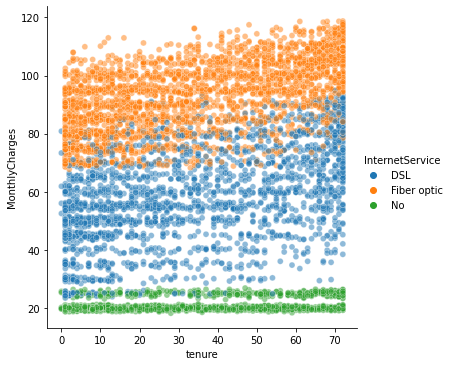

In [39]:
sns.relplot(x=telco["tenure"], y=telco["MonthlyCharges"], hue=telco["InternetService"],
            sizes=(40, 400), alpha=.5, data=telco)

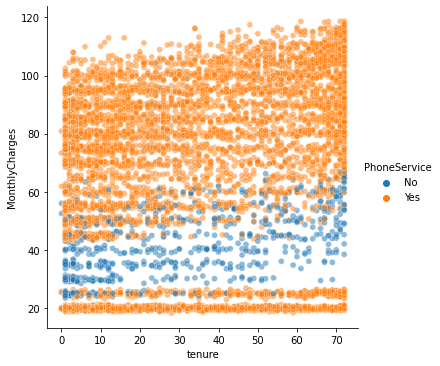

In [40]:
sns.relplot(x=telco["tenure"], y=telco["MonthlyCharges"], hue=telco["PhoneService"],sizes=(40, 400), alpha=.5, data=telco)

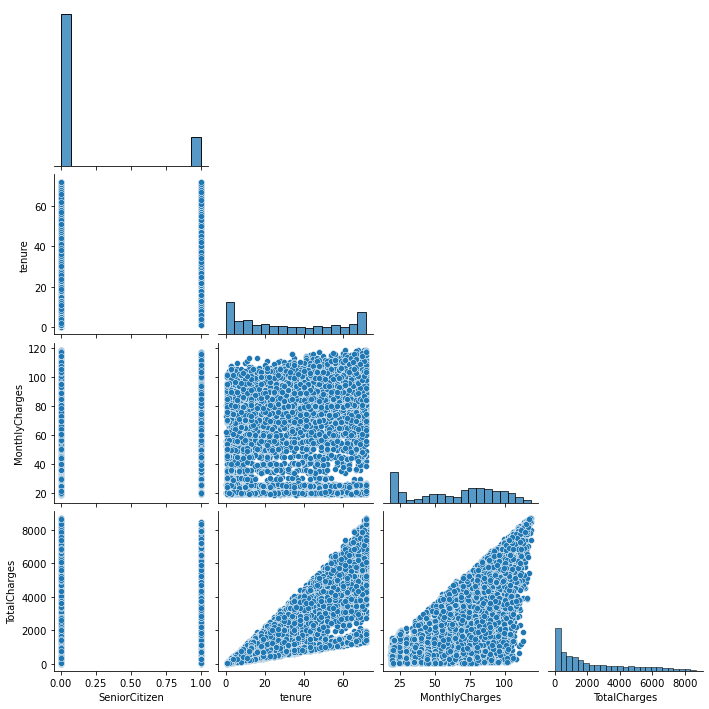

In [32]:
sns.pairplot(telco, corner=True)
plt.show()

<AxesSubplot:>

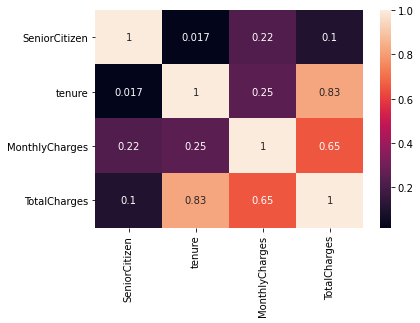

In [24]:
sns.heatmap(telco.corr(), annot=True)

# Chi Squared Exercises

#### 1.  Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

Null Hypothesis: There is no association between being a Codeup student and using a Macbook

Alternate Hypothesis: There is an association between being a Codeup student and using a Macbook

Use p-value to decide if we reject the null or fail to reject the null


In [8]:
alpha = .05
index = ['Uses a Macbook', "Doesn't Use A Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed.head()

,Codeup Student,Not Codeup Student
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [9]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


In [10]:
if p < alpha:
    print('We reject the null')
else:
    print("we fail to reject the null")

We reject the null


#### 2.  Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

Form the null and alternate hypothesis

- $H_0$: There is no association between manufacturer and year (independence)
- $H_a$: There is an association between manufacturer and year

Use p-value to decide if we reject the null or fail to reject the null

In [14]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
observed = pd.crosstab(mpg.manufacturer, mpg.year)
observed

year,1999,2008
manufacturer,,
audi,9,9
chevrolet,7,12
dodge,16,21
ford,15,10
honda,5,4
hyundai,6,8
jeep,2,6
land rover,2,2
lincoln,2,1


In [20]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 9  9]
 [ 7 12]
 [16 21]
 [15 10]
 [ 5  4]
 [ 6  8]
 [ 2  6]
 [ 2  2]
 [ 2  1]
 [ 2  2]
 [ 6  7]
 [ 3  2]
 [ 6  8]
 [20 14]
 [16 11]]
---
Expected

[[ 9.   9. ]
 [ 9.5  9.5]
 [18.5 18.5]
 [12.5 12.5]
 [ 4.5  4.5]
 [ 7.   7. ]
 [ 4.   4. ]
 [ 2.   2. ]
 [ 1.5  1.5]
 [ 2.   2. ]
 [ 6.5  6.5]
 [ 2.5  2.5]
 [ 7.   7. ]
 [17.  17. ]
 [13.5 13.5]]
---

chi^2 = 8.2690
p     = 0.8748


In [21]:
null_hypothesis = "Manufacturer and Year are independent"

if p < alpha:
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### 3.  Use the data from the employees database to answer these questions:

#### Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

#### Is an employee's gender independent of whether or not they are or have been a manager?